In [10]:
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'Foundry',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)
plt.rc('text', usetex=True)

In [2]:
def wwt(C,P):
    return C/(P*P)

def upfromP(rho,C0,S,P):
    return (C0/(2*S))*(np.sqrt(1+(4*S*P/(rho*C0*C0)))-1)

#### PBX 9404 from  Roth 1970

In [3]:
C0 = 2450 #m/s
S = 2.48
rho = 1840 #kg/m^3

#### Walker-Wasley

In [4]:
C = 4.09e12

In [5]:
Pww = np.linspace(1e8,100e9,10000) #Pa
t = wwt(C,Pww) #s
upww = upfromP(rho,C0,S,Pww)

#### Modified James

In [6]:
Pic = 0.0115e13 #GW/cm^2
Ec = 0.0474e7 #kJ/cm^2

In [7]:
Pj = np.linspace(7.8e8,100e9,10000)
upj = upfromP(rho,C0,S,Pj)

tau = (Ec/(1.-(Pic/(Pj*upj))))/(Pj*upj)

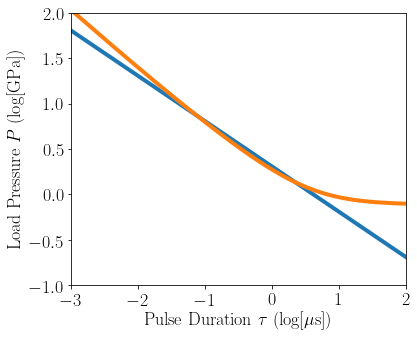

In [11]:
fig= plt.figure(figsize=(6,5))
plt.plot(np.log10(t*1e6),np.log10(Pww/1e9),linewidth=4)
plt.plot(np.log10(tau*1e6),np.log10(Pj/1e9),linewidth=4)
plt.xlabel(r'Pulse Duration $\tau$ (log[$\mu$s])')
plt.ylabel(r'Load Pressure $P$ (log[GPa])')
plt.xlim([-3,2])
plt.ylim([-1,2])
plt.show()

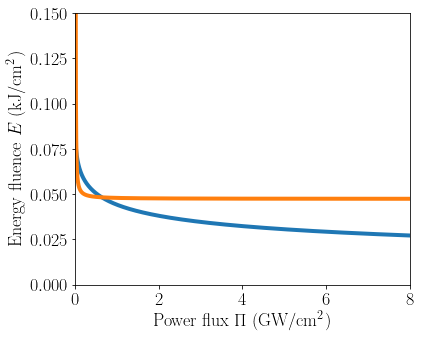

In [12]:
fig= plt.figure(figsize=(6,5))
plt.plot(Pww*upww/1e13,Pww*upww*t/1e7,linewidth=4)
plt.plot(Pj*upj/1e13,Pj*upj*tau/1e7,linewidth=4)
plt.xlabel(r'Power flux $\Pi$ (GW/cm$^2$)')
plt.ylabel(r'Energy fluence $E$ (kJ/cm$^2$)')
plt.xlim([0,8])
plt.ylim([0,0.15])
plt.show()